# Predict the stock market

Проводится работа с выборкой из актуального фондового индекса S&P500. На этих данных будет построена модель классификации, предсказывающая рост или падение котировок.

Описание датасета:
- Open (Цена на момент открытия рынка)
- High (Самая высокая цена в течение сессии)
- Low (Самая низкая цена в течение сессии)
- Close (Цена на момент закрытия рынка)
- Volume (Общее количество проданных акций)
- Dividends (Дивиденты)

In [5]:
!pip install yfinance

  Attempting uninstall: pytz
    Found existing installation: pytz 2021.3
    Uninstalling pytz-2021.3:
      Successfully uninstalled pytz-2021.3
  Attempting uninstall: lxml
    Found existing installation: lxml 4.6.3
    Uninstalling lxml-4.6.3:
      Successfully uninstalled lxml-4.6.3
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.10.0
    Uninstalling beautifulsoup4-4.10.0:
      Successfully uninstalled beautifulsoup4-4.10.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.


In [205]:
import yfinance as yf
import pandas as pd
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

In [206]:
if os.path.exists("sp500.csv"):
    sp500 = pd.read_csv("sp500.csv", index_col=0)
else:
    sp500 = yf.Ticker("^GSPC")
    sp500 = sp500.history(period="max")
    sp500.to_csv("sp500.csv")

In [207]:
sp500.index = pd.to_datetime(sp500.index)

In [208]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-05-26 00:00:00-04:00,4156.160156,4212.870117,4156.160156,4205.450195,3715460000,0.0,0.0
2023-05-30 00:00:00-04:00,4226.709961,4231.100098,4192.180176,4205.520020,4228510000,0.0,0.0
2023-05-31 00:00:00-04:00,4190.740234,4195.439941,4166.149902,4179.830078,5980670000,0.0,0.0


In [2]:
#Удаление колонок, которые не будут использоваться.
sp500.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)

NameError: name 'sp500' is not defined

In [219]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-05-26 00:00:00-04:00,4156.160156,4212.870117,4156.160156,4205.450195,3715460000,4205.520020,1
2023-05-30 00:00:00-04:00,4226.709961,4231.100098,4192.180176,4205.520020,4228510000,4179.830078,0
2023-05-31 00:00:00-04:00,4190.740234,4195.439941,4166.149902,4179.830078,5980670000,4221.020020,1


Генерируем целевой столбец, который будет указывать на рост или падение цены. Для этого необходимо создать колонку, в которой будет отражена цена следующего дня. 
Также необходимо удалить все данные до 1990 года. Слишком старые данные могут оказаться бесполезными для будущих прогнозов.

In [210]:
drop_years = []
for x in sp500.index:
    if x.year < 1990:
        drop_years.append(x)

In [215]:
sp500.drop(drop_years, inplace=True)

KeyError: '[datetime.datetime(1927, 12, 30, 0, 0, tzinfo=tzoffset(None, -18000))\n datetime.datetime(1928, 1, 3, 0, 0, tzinfo=tzoffset(None, -18000))\n datetime.datetime(1928, 1, 4, 0, 0, tzinfo=tzoffset(None, -18000)) ...\n datetime.datetime(1989, 12, 27, 0, 0, tzinfo=tzoffset(None, -18000))\n datetime.datetime(1989, 12, 28, 0, 0, tzinfo=tzoffset(None, -18000))\n datetime.datetime(1989, 12, 29, 0, 0, tzinfo=tzoffset(None, -18000))] not found in axis'

In [216]:
sp500['Tomorrow'] = sp500["Close"].shift(-1)

In [217]:
sp500['Target'] = (sp500.Tomorrow > sp500.Close).astype(int)

<AxesSubplot:xlabel='Date'>

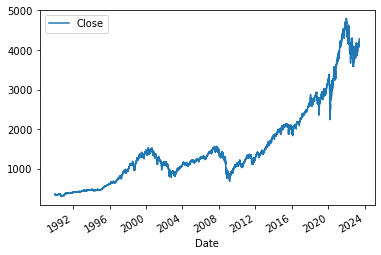

In [218]:
sp500.plot.line(y="Close", use_index=True)

В качестве модели будет использован RandomForestClassifier. Для измерения точности модели -  precision_score.

In [220]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

In [138]:
sp500.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Tomorrow', 'Target'], dtype='object')

In [221]:
predictors = ['Open', 'High', 'Low', 'Close', 'Volume']

In [222]:
train = sp500.iloc[:-100]
test = sp500.iloc[-100 :]

In [223]:
model.fit(train[predictors], train.Target)

RandomForestClassifier(min_samples_split=100, random_state=1)

In [224]:
pred = model.predict(test[predictors])

In [227]:
precision_score(test.Target, pred)

0.5185185185185185

<AxesSubplot:xlabel='Date'>

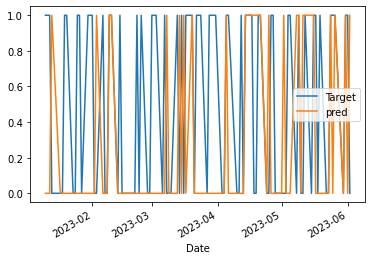

In [228]:
combined = test.Target.reset_index()
combined['pred'] = pred
combined = combined.set_index('Date')
combined.plot()

Создание функции прогнозирования и функции обратного тестирования.Сначала модель будет обучаться на данных за десять лет, затем использует их для прогнозирования значений за 11-й год. Затем возьмет данные за первые 11 лет и использует их для прогнозирования значений на 12-й год. И так далее.

In [229]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    pred = model.predict(test[predictors])
    pred = pd.Series(pred, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], pred], axis=1)
    return combined

In [230]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [231]:
predictions = backtest(sp500, model, predictors)

In [232]:
precision_score(predictions.Target, predictions.Predictions)

0.5236580516898608

In [233]:
predictions

,Target,Predictions
Date,,
1999-11-22 00:00:00-05:00,0,0
1999-11-23 00:00:00-05:00,1,0
1999-11-24 00:00:00-05:00,0,0
1999-11-26 00:00:00-05:00,0,0
1999-11-29 00:00:00-05:00,0,0
...,...,...
2023-05-26 00:00:00-04:00,1,0
2023-05-30 00:00:00-04:00,0,0
2023-05-31 00:00:00-04:00,1,1


Добавим несколько дополнительных предикторов, чтобы повысить точность модели. Мы можем добавить  скользящие средние, среднюю цену закрытия за последние два дня, пять дней, три месяца и т.д.
Также необходимо немного доработать функцию прогнозирования. Для этого используем метод predict_proba, который вернет вероятность того, что строка будет равна 0 или 1. Это позволит установить пользовательский порог — скажем, 60%. Таким образом, модель должна быть более уверенной в том, что цена увеличится, чтобы показать, что цена будет расти.

In [234]:
horizons = [2, 5, 60, 250, 1000]
new_predictors = []

In [235]:
for horizon in horizons:
    rolling_average = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500.Close / rolling_average.Close
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()['Target']
    
    new_predictors+= [ratio_column, trend_column]

In [237]:
sp500.dropna(inplace=True)

In [238]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-25 00:00:00-04:00,4155.709961,4165.740234,4129.729980,4151.279785,4147760000,4205.450195,1,1.004360,1.0,0.998062,2.0,1.019727,32.0,1.045639,114.0,1.104693,533.0
2023-05-26 00:00:00-04:00,4156.160156,4212.870117,4156.160156,4205.450195,3715460000,4205.520020,1,1.006482,2.0,1.010431,3.0,1.032086,32.0,1.059234,114.0,1.118712,533.0
2023-05-30 00:00:00-04:00,4226.709961,4231.100098,4192.180176,4205.520020,4228510000,4179.830078,0,1.000008,2.0,1.009822,3.0,1.031429,32.0,1.059173,115.0,1.118338,533.0


In [239]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [240]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    pred = model.predict_proba(test[predictors])[:,1]
    pred[pred >= .6] = 1
    pred[pred < .6] = 0
    pred = pd.Series(pred, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], pred], axis=1)
    return combined

In [241]:
predictions = backtest(sp500, model, new_predictors)

In [242]:
precision_score(predictions.Target, predictions.Predictions)

0.5687960687960688

In [243]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.54381
0    0.45619
Name: Target, dtype: float64